#### This ntb is meant as an update of CEE countries (and regions) competitivness.
The main focus will be on the current value of ULC (Unit Laboru Cost) as outlined by Dustmann et al. (2014) for Germany (or maybe its preliminary version)
and some Figures summing up sectoral specialization inspired by Schröder (2020) - underlying question: is Manufacturing core holding, and is it still bind together by attraction of the lowest ULC?

In [372]:
import pandas as pd
#import pandas_datareader as pdr
import requests
import eurostat
import pyreadr

from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

from helper import (oecd_res2df, harmonise_base_year, do_fuzzy_search)

In [371]:
from importlib import reload
import helper
reload(helper)
from helper import oecd_res2df, harmonise_base_year, do_fuzzy_search

In [262]:
visegrad = {'CZ': "Czech Republic", 'HU': "Hungary", 'PL': "Poland", 'SK': "Slovak Republic"}
CEE_non_core = {'RO': 'Romania', 'BG': 'Bulgaria', 'EE': 'Estonia', 'LT': 'Lithuania', 'LV': 'Latvia', 'SI': 'Slovenia'}
germany_plus = {'DE': 'Germany', 'AT': "Austria"}
southern = {'IT': 'Italy', 'ES': 'Spain', 'PT': 'Portugal', 'GR': 'Greece'}
west = {'NL': 'Netherlands', 'BE': 'Belgium', 'UK': 'United Kingdom', 'FR': 'France', 'LU': 'Luxembourg', 'IR': 'Ireland'}
north = {'NOR': 'Norway', 'SE': 'Sweden', 'DK': 'Denmark', 'FI': 'Finland'}
emu = {'AT': 'Austria', 'BE': 'Belgium', 'CYP': 'Cyprus', 'EE': 'Estonia', 'FI': 'Finland', 'FR': 'France',
       'DE': 'Germany', 'GR': 'Greece', 'IR': 'Ireland', 'IT': 'Italy', 'LV': 'Latvia', 'LT': 'Lithuania', 'LU': 'Luxembourg',
        'MLT': 'Malta', 'NL': 'Netherlands', 'PT': 'Portugal', 'SK': "Slovak Republic", "SI": "Slovenia", "ES": "Spain"}

### Dustmann (2014) - Figure 1 = ULC

In [107]:
### Dustmann (2014) - Figure 1
# 'ULC_EEQ'
#ulc_eeq_query = "https://stats.oecd.org/SDMX-JSON/data/ULC_EEQ/AUS+AUT+BEL+CAN+CZE+DNK+EST+FIN+FRA+DEU+GRC+HUN+IRL+ISR+ITA+JPN+KOR+LVA+LTU+LUX+NLD+NZL+NOR+POL+PRT+SVK+SVN+ESP+SWE+CHE+TUR+GBR+USA.ULQEUL01+ULQECU01+ULQELP01.IXOB+IXOBSA+GPSA+GYSA.Q/all?startTime=2010-Q1&endTime=2022-Q1&dimensionAtObservation=allDimensions"
ulc_eeq_query = "https://stats.oecd.org/SDMX-JSON/data/ULC_EEQ/AUS+AUT+BEL+CAN+CZE+DNK+EST+FIN+FRA+DEU+GRC+HUN+IRL+ISR+ITA+JPN+KOR+LVA+LTU+LUX+NLD+NZL+NOR+POL+PRT+SVK+SVN+ESP+SWE+CHE+TUR+GBR+USA.ULQEUL01.IXOB.Q/all?startTime=2010-Q1&endTime=2022-Q1&dimensionAtObservation=allDimensions"

In [ ]:
r = requests.get(ulc_eeq_query)
r_dt = r.json()
df = oecd_res2df(r_dt)
df.info()
df.head()

ulc_df = df.melt(id_vars=['country'], var_name='quarter', value_name='index')
ulc_df['index'] = ulc_df['index'].astype('float')

In [234]:
t_period = ulc_df["quarter"].str.split("-", n = 1, expand = True)
ulc_df['year'] = t_period[0].astype('int')
ulc_df = ulc_df.sort_values('year')
ulc_yr = ulc_df.groupby(['country', 'year']).agg({'index': 'mean'}).reset_index()

ulc_yr['region'] = np.where(ulc_yr['country'].isin(visegrad.values()), "visegrad", 
                            np.where(ulc_yr['country'].isin(southern.values()), 'south',
                                     np.where(ulc_yr['country'].isin(germany_plus.values()), 'DE_AT',
                                              np.where(ulc_yr['country'].isin(west.values()), 'west',
                                                       np.where(ulc_yr['country'].isin(north.values()), 'north',
                                                                np.where(ulc_yr['country'].isin(CEE_non_core.values()), 'CEE_non_core', 'rest')
                                                               )
                                                        )
                                                ) 
                                    )
                            )


### The picture below suggest:
- higher ULC growth in CEE since 2015 than in the Western Europe
- development in the rest of the CEE is similar (this can be important as they are possible competitors) NOTE: RO+BG note contained
- continuos rise of the ULC after 2019 while the West goes to a decrease
- examining the components of the time series, we can see that the rise is comprised above all of rising per employee compensation (higher than in DE) and not so fast rising physical productivity (in the the sense of GDP per employee change, NOTE: however that productivity is actually rising faster in CEE than in the West)

Does this threaten the CEE position as Manufacturing Core? Is it a sign of transformation of the economic model

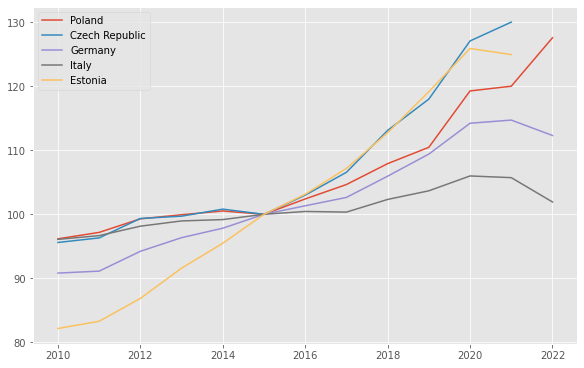

In [232]:
ulc_yr_plot = ulc_yr.groupby('country')
with plt.style.context('ggplot'):
    fig, ax = plt.subplots(constrained_layout=True, figsize=(8, 5))
    ax.plot(ulc_yr_plot.get_group('Poland')['year'], ulc_yr_plot.get_group('Poland')['index'], label='Poland')
    ax.plot(ulc_yr_plot.get_group('Czech Republic')['year'], ulc_yr_plot.get_group('Czech Republic')['index'], label='Czech Republic')
    ax.plot(ulc_yr_plot.get_group('Germany')['year'], ulc_yr_plot.get_group('Germany')['index'], label='Germany')
    ax.plot(ulc_yr_plot.get_group('Italy')['year'], ulc_yr_plot.get_group('Italy')['index'], label='Italy')
    ax.plot(ulc_yr_plot.get_group('Estonia')['year'], ulc_yr_plot.get_group('Estonia')['index'], label='Estonia')
    #ax.plot(ulc_yr_plot.get_group('Türkiye')['year'], ulc_yr_plot.get_group('Türkiye')['index'], label='Türkiye') # NOTE: extreme values for Turkey


    ax.legend()

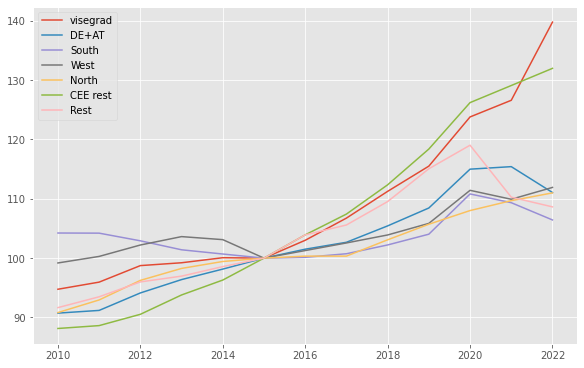

In [240]:
ulc_yr_regions = ulc_yr.groupby(['region', 'year']).agg({'index': 'mean'}).reset_index().groupby('region')
with plt.style.context('ggplot'):
    fig, ax = plt.subplots(constrained_layout=True, figsize=(8, 5))
    ax.plot(ulc_yr_regions.get_group('visegrad')['year'], ulc_yr_regions.get_group('visegrad')['index'], label='visegrad')
    ax.plot(ulc_yr_regions.get_group('DE_AT')['year'], ulc_yr_regions.get_group('DE_AT')['index'], label='DE+AT')
    ax.plot(ulc_yr_regions.get_group('south')['year'], ulc_yr_regions.get_group('south')['index'], label='South')
    ax.plot(ulc_yr_regions.get_group('west')['year'], ulc_yr_regions.get_group('west')['index'], label='West')
    ax.plot(ulc_yr_regions.get_group('north')['year'], ulc_yr_regions.get_group('north')['index'], label='North')
    ax.plot(ulc_yr_regions.get_group('CEE_non_core')['year'], ulc_yr_regions.get_group('CEE_non_core')['index'], label='CEE rest')
    ax.plot(ulc_yr_regions.get_group('rest')['year'], ulc_yr_regions.get_group('rest')['index'], label='Rest')
# NOTE: no RO + BG in OECD data -  CEE rest are only Baltics


    ax.legend()

In [236]:
ulc_yr.groupby(['region', 'year']).get_group(('rest', 2014))['country'].unique()

array(['Australia', 'Israel', 'Japan', 'Korea', 'New Zealand',
       'Switzerland', 'Türkiye'], dtype=object)

### Specialization on Manufacturing - still relevant?

In [ ]:
# nama_10_a10
# nama_10_a10_e
# resp. regional: NAMA_10R_2EMHRW

# OECD SNA_TABLE6 ???

##### Employment

In [246]:
nama_10_a10_e = eurostat.get_data_df("nama_10_a10_e").rename(columns={"geo\\time": "Country"})
nama_10_a10_e = nama_10_a10_e.loc[np.where((
                                  (nama_10_a10_e['unit'] == "PC_TOT_HW") & # Percentage of total (based on hours worked)
                                  (nama_10_a10_e['na_item'] == "EMP_DC") &
                                  (nama_10_a10_e['nace_r2'] == "C")
                                ))]
spec_employ = nama_10_a10_e.melt(id_vars = ['Country', 'nace_r2'], value_vars = range(2005, 2021),
                   var_name = 'year', value_name = 'employ_share')
spec_employ['year'] = spec_employ['year'].astype(int)


spec_employ['region'] = np.where(spec_employ['Country'].isin(visegrad), "visegrad", 
                                 np.where(spec_employ['Country'].isin(southern), 'south',
                                          np.where(spec_employ['Country'].isin(germany_plus), 'DE_AT',
                                                   np.where(spec_employ['Country'].isin(west), 'west',
                                                            np.where(spec_employ['Country'].isin(north), 'north',
                                                                    np.where(spec_employ['Country'].isin(CEE_non_core), 'CEE_non_core', 'rest')
                                                                    )
                                                           )
                                                  )
                                         )
                                 )

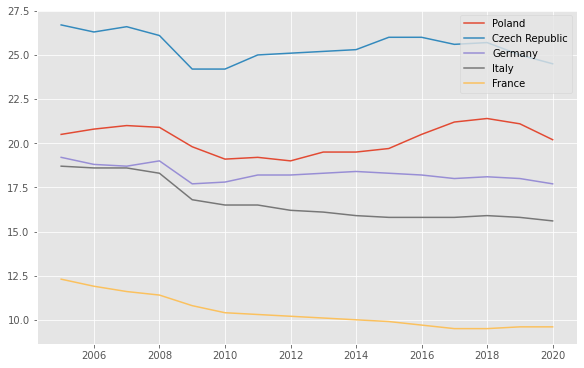

In [206]:
# Figure 2
spec_employ_plot = spec_employ.groupby('Country')
with plt.style.context('ggplot'):
    fig, ax = plt.subplots(constrained_layout=True, figsize=(8, 5))
    ax.plot(spec_employ_plot.get_group('PL')['year'], spec_employ_plot.get_group('PL')['employ_share'], label='Poland')
    ax.plot(spec_employ_plot.get_group('CZ')['year'], spec_employ_plot.get_group('CZ')['employ_share'], label='Czech Republic')
    ax.plot(spec_employ_plot.get_group('DE')['year'], spec_employ_plot.get_group('DE')['employ_share'], label='Germany')
    ax.plot(spec_employ_plot.get_group('IT')['year'], spec_employ_plot.get_group('IT')['employ_share'], label='Italy')
    ax.plot(spec_employ_plot.get_group('FR')['year'], spec_employ_plot.get_group('FR')['employ_share'], label='France')

    ax.legend()

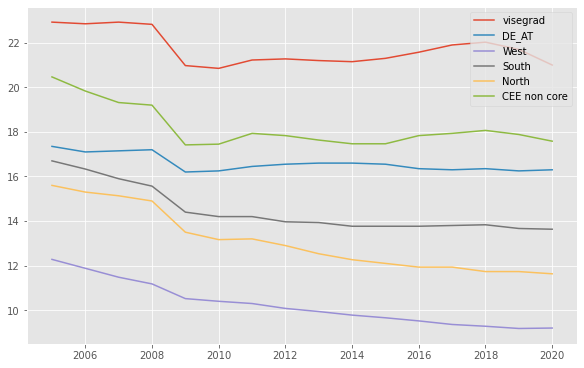

In [250]:
# Figure 2 - aggregated regions
spec_employ_regions = spec_employ.groupby(['region', 'year']).agg({'employ_share': 'mean'}).reset_index().groupby('region')
with plt.style.context('ggplot'):
    fig, ax = plt.subplots(constrained_layout=True, figsize=(8, 5))
    ax.plot(spec_employ_regions.get_group('visegrad')['year'], spec_employ_regions.get_group('visegrad')['employ_share'], label='visegrad')
    ax.plot(spec_employ_regions.get_group('DE_AT')['year'], spec_employ_regions.get_group('DE_AT')['employ_share'], label='DE_AT')
    ax.plot(spec_employ_regions.get_group('west')['year'], spec_employ_regions.get_group('west')['employ_share'], label='West')
    ax.plot(spec_employ_regions.get_group('south')['year'], spec_employ_regions.get_group('south')['employ_share'], label='South')
    #ax.plot(spec_employ_regions.get_group('north')['year'], spec_employ_regions.get_group('north')['employ_share'], label='North')
    ax.plot(spec_employ_regions.get_group('CEE_non_core')['year'], spec_employ_regions.get_group('CEE_non_core')['employ_share'], label='CEE non core')
    ax.legend()

In [248]:
spec_employ.groupby(['region', 'year']).get_group(('rest', 2014))['Country'].unique()

array(['CY', 'EA', 'EA12', 'EA19', 'EL', 'EU15', 'EU27_2020', 'EU28',
       'HR', 'IE', 'IS', 'MT', 'NO', 'RS', 'XK'], dtype=object)

#### Value added

In [252]:
nama_10_a10 = eurostat.get_data_df("nama_10_a10").rename(columns={"geo\\time": "Country"})
nama_10_a10 = nama_10_a10.loc[np.where((
                                  (nama_10_a10['unit'] == "PC_GDP") & # Percentage of gross domestic product (GDP)
                                  (nama_10_a10['na_item'] == "B1G") &
                                  (nama_10_a10['nace_r2'] == "C")
                                ))]
spec_gva = nama_10_a10.melt(id_vars = ['Country', 'nace_r2'], value_vars = range(2005, 2021),
                   var_name = 'year', value_name = 'gva_share')
spec_gva['year'] = spec_gva['year'].astype(int)

spec_gva['region'] = np.where(spec_gva['Country'].isin(visegrad), "visegrad", 
                            np.where(spec_gva['Country'].isin(southern), 'south',
                                     np.where(spec_gva['Country'].isin(germany_plus), 'DE_AT',
                                              np.where(spec_gva['Country'].isin(west), 'west', 
                                                       np.where(spec_gva['Country'].isin(north), 'north',
                                                                np.where(spec_gva['Country'].isin(CEE_non_core), 'CEE_non_core', 'rest')
                                                                )
                                                      )
                                              )
                                    )
                            )

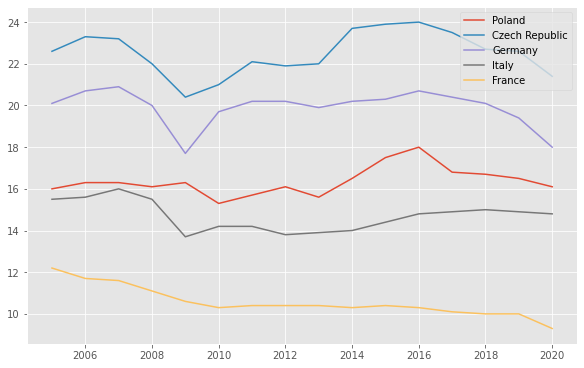

In [253]:
# Figure 3 VA specialization
spec_gva_plot = spec_gva.groupby('Country')

with plt.style.context('ggplot'):
    fig, ax = plt.subplots(constrained_layout=True, figsize=(8, 5))
    ax.plot(spec_gva_plot.get_group('PL')['year'], spec_gva_plot.get_group('PL')['gva_share'], label='Poland')
    ax.plot(spec_gva_plot.get_group('CZ')['year'], spec_gva_plot.get_group('CZ')['gva_share'], label='Czech Republic')
    ax.plot(spec_gva_plot.get_group('DE')['year'], spec_gva_plot.get_group('DE')['gva_share'], label='Germany')
    ax.plot(spec_gva_plot.get_group('IT')['year'], spec_gva_plot.get_group('IT')['gva_share'], label='Italy')
    ax.plot(spec_gva_plot.get_group('FR')['year'], spec_gva_plot.get_group('FR')['gva_share'], label='France')

    ax.legend()

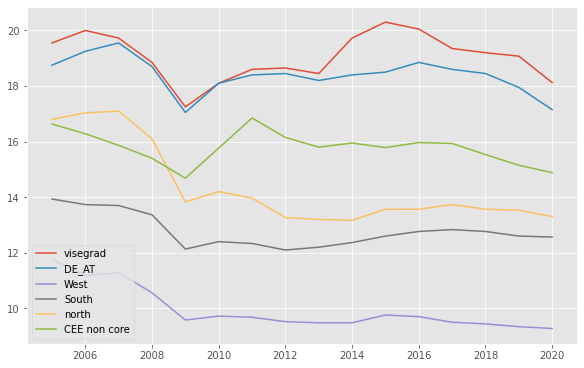

In [255]:
# Figure 2 - aggregated regions
spec_gva_regions = spec_gva.groupby(['region', 'year']).agg({'gva_share': 'mean'}).reset_index().groupby('region')
with plt.style.context('ggplot'):
    fig, ax = plt.subplots(constrained_layout=True, figsize=(8, 5))
    ax.plot(spec_gva_regions.get_group('visegrad')['year'], spec_gva_regions.get_group('visegrad')['gva_share'], label='visegrad')
    ax.plot(spec_gva_regions.get_group('DE_AT')['year'], spec_gva_regions.get_group('DE_AT')['gva_share'], label='DE_AT')
    ax.plot(spec_gva_regions.get_group('west')['year'], spec_gva_regions.get_group('west')['gva_share'], label='West')
    ax.plot(spec_gva_regions.get_group('south')['year'], spec_gva_regions.get_group('south')['gva_share'], label='South')
    ax.plot(spec_gva_regions.get_group('north')['year'], spec_gva_regions.get_group('north')['gva_share'], label='north')
    ax.plot(spec_gva_regions.get_group('CEE_non_core')['year'], spec_gva_regions.get_group('CEE_non_core')['gva_share'], label='CEE non core')
    ax.legend()

### Summary:
- obvious divergence in ULC dynamics in the CEE part of labour core - potential to threaten their possition in the EU Value Chain?
- Rest of the CEE seems to have a similar trend in their behaviour
- Corresponding to there seem to be signif decline in the manufacturing specialization measured both in terms of employment and of VA
- Both VA and Employment seem to rise/fall together
- Is the end of Manufacturing Core near?

### Additional Variables - deflators and PPPs
#### World bank GDP deflator: NY.GDP.DEFL.ZS (NY.GDP.DEFL.ZS.AD), NY.GDP.DEFL.KD.ZG.AD
#### or get VA deflator using NV.IND.MANF.KD, NV.IND.MANF.KN (see Golub et al., 2018)

In [373]:
# GDP Deflator: NY.GDP.DEFL.ZS.AD
# TODO: covert to base 2015
gdp_deflator_raw = pd.read_csv("WB_NY.GDP.DEFL.ZS.AD.csv")
val_cols = [f'{2000 + i}' for i in range(4, 22)]
gdp_deflator = gdp_deflator_raw.melt(id_vars=['Country Name', 'Country Code'], value_vars=val_cols)
gdp_deflator['year'] = gdp_deflator['variable'].str.split(" ", n = 1, expand = True)[0].astype(int)
gdp_deflator = gdp_deflator.rename(columns={'Country Name': 'country_name', 'value': 'value_deflator'}).drop('variable', axis=1)
gdp_deflator = gdp_deflator.groupby('country_name').apply(lambda x: harmonise_base_year(x, 2015)) # Harmonize the deflator to 2015 = deflator_2015
gdp_deflator['country_code'] = gdp_deflator['country_name'].apply(lambda x: do_fuzzy_search(x))
gdp_deflator.dropna().head()

,country_name,Country Code,value_deflator,year,deflator_2015,country_code
0,Aruba,ABW,81.766613,2004,0.779280,AW
1,Africa Eastern and Southern,AFE,NaN,2004,NaN,NaN
2,Afghanistan,AFG,50.093030,2004,0.489922,AF
3,Africa Western and Central,AFW,NaN,2004,NaN,NaN
4,Angola,AGO,258.782582,2004,0.302539,AO


In [375]:
## PPP exchange rate use World Bank: PA.NUS.PPP
ppp_raw =  pd.read_csv("WB_PA.NUS.PPP.csv")
ppp_raw = ppp_raw.melt(id_vars=['Country Name', 'Country Code'], value_vars=val_cols)
ppp_raw['year'] = ppp_raw['variable'].str.split(" ", n = 1, expand = True)[0].astype(int)
ppp_raw = ppp_raw.rename(columns={'Country Name': 'country_name', 'value': 'value_ppp'})
ppp_raw['country_code'] = ppp_raw['country_name'].apply(lambda x: do_fuzzy_search(x))
ppp_raw = ppp_raw.drop('variable', axis=1)

# market exchange rate: PA.NUS.FCRF
#ex = pd.read_csv("PA.NUS.FCRF.csv")
ex = pd.read_csv("WB_PA.NUS.FCRF.csv")
ex = ex.melt(id_vars=['Country Name', 'Country Code'], value_vars=val_cols)
ex['year'] = ex['variable'].str.split(" ", n = 1, expand = True)[0].astype(int)
ex = ex.rename(columns={'Country Name': 'country_name', 'value': 'value_ex'})
ex = ex.drop('variable', axis=1)

ex_emu = ex[ex["Country Code"] == 'EMU'].rename(columns = {'value_ex': 'value_eur', 'country_name': 'monetary_union'}).drop('Country Code', axis=1) # get Euro ExR
ex['monetary_union'] = np.where(ex['country_name'].isin(emu.values()), "Euro area", "non_emu")
ex = ex.merge(ex_emu, on=['monetary_union', 'year'], how='left')
ex['final_ex_rate'] = ex['value_ex'].combine_first(ex['value_eur']) # Only diff to value_ex is that Euro area countries have NaNs for Ex after they adopt Euro,this fixes it
ex['country_code'] = ex['country_name'].apply(lambda x: do_fuzzy_search(x))
ex.head()

,country_name,Country Code,value_ex,year,monetary_union,value_eur,final_ex_rate,country_code
0,Aruba,ABW,1.790000,2004,non_emu,NaN,1.790000,AW
1,Africa Eastern and Southern,AFE,NaN,2004,non_emu,NaN,NaN,NaN
2,Afghanistan,AFG,47.845312,2004,non_emu,NaN,47.845312,AF
3,Africa Western and Central,AFW,NaN,2004,non_emu,NaN,NaN,NaN
4,Angola,AGO,83.541363,2004,non_emu,NaN,83.541363,AO


### EU-KLEMS: More detailed analysis - getting absolute values of ULC
#### Goal: get ULC by own calculation and also on a sectoral level
#### variables description: https://www.dropbox.com/s/ziu7wpl8pgqhq51/Variable%20List.xlsx?dl=0

In [68]:
klems_na = pyreadr.read_r("national accounts.rds")[None]
klems_na = klems_na.astype({"year": int})
klems_na['region'] = np.where(klems_na['geo_code'].isin(visegrad), "visegrad", 
                            np.where(klems_na['geo_code'].isin(southern), 'south',
                                     np.where(klems_na['geo_code'].isin(germany_plus), 'DE_AT',
                                              np.where(klems_na['geo_code'].isin(west), 'west', 
                                                       np.where(klems_na['geo_code'].isin(north), 'north',
                                                                np.where(klems_na['geo_code'].isin(CEE_non_core), 'CEE_non_core', 'rest')
                                                                )
                                                      )
                                              )
                                    )
                            )
klems_na.head()

,nace_r2_code,geo_code,nace_r2_name,geo_name,year,COMP,EMP,EMPE,GO_CP,GO_PI,...,H_EMPE,II_CP,II_PI,II_PYP,II_Q,VA_CP,VA_PI,VA_PYP,VA_Q,region
0,A,AT,"Agriculture, forestry and fishing",Austria,1995,363.7,273.10,20.59,7656.1,92.326044,...,39192.0,3843.9,74.985756,4168.299699,5126.173576,3812.3,116.708,3917.4,3266.528430,DE_AT
1,A,AT,"Agriculture, forestry and fishing",Austria,1996,369.6,260.92,20.40,7485.4,89.203056,...,38589.0,3866.6,73.638100,3937.362930,5250.814488,3618.8,110.849,3810.1,3264.621242,DE_AT
2,A,AT,"Agriculture, forestry and fishing",Austria,1997,380.5,254.58,20.88,7632.7,89.326044,...,39008.0,4036.6,74.460979,3991.990935,5421.094460,3596.1,109.807,3630.2,3274.927828,DE_AT
3,A,AT,"Agriculture, forestry and fishing",Austria,1998,382.0,244.97,20.28,7414.2,85.778455,...,38325.0,3893.0,73.579585,3939.633414,5290.869760,3521.2,102.255,3781.2,3443.547993,DE_AT
4,A,AT,"Agriculture, forestry and fishing",Austria,1999,398.4,240.43,20.74,7385.2,83.380806,...,39831.0,3874.4,73.007411,3904.764431,5306.858477,3510.8,97.215,3692.8,3611.376845,DE_AT


In [69]:
print(klems_na['nace_r2_code'].unique())
print(klems_na['geo_code'].unique())
print(klems_na.columns)

['A' 'B' 'C' 'C10-C12' 'C13-C15' 'C16-C18' 'C19' 'C20' 'C20-C21' 'C21'
 'C22-C23' 'C24-C25' 'C26' 'C26-C27' 'C27' 'C28' 'C29-C30' 'C31-C33' 'D'
 'D-E' 'E' 'F' 'G' 'G45' 'G46' 'G47' 'H' 'H49' 'H50' 'H51' 'H52' 'H53' 'I'
 'J' 'J58-J60' 'J61' 'J62-J63' 'K' 'L' 'L68A' 'M' 'M-N' 'MARKT' 'N'
 'MARKTxAG' 'O' 'O-Q' 'P' 'Q' 'Q86' 'Q87-Q88' 'R' 'R-S' 'S' 'T' 'TOT'
 'TOT_IND' 'U']
['AT' 'BE' 'BG' 'CY' 'CZ' 'DE' 'DK' 'EA19' 'EE' 'EL' 'ES' 'EU11' 'EU12'
 'EU15' 'EU19' 'EU20' 'EU27_2020' 'EU28' 'FI' 'FR' 'HR' 'HU' 'IE' 'IT'
 'JP' 'LT' 'LU' 'LV' 'MT' 'NL' 'PL' 'PT' 'RO' 'SE' 'SI' 'SK' 'UK' 'US']
Index(['nace_r2_code', 'geo_code', 'nace_r2_name', 'geo_name', 'year', 'COMP',
       'EMP', 'EMPE', 'GO_CP', 'GO_PI', 'GO_PYP', 'GO_Q', 'H_EMP', 'H_EMPE',
       'II_CP', 'II_PI', 'II_PYP', 'II_Q', 'VA_CP', 'VA_PI', 'VA_PYP', 'VA_Q',
       'region'],
      dtype='object')


In [83]:
# Dustmann (2014): Figure 1 notes: unit labor cost for country i in period t, computed as the total wage bill (w_it*L_it)) divided by the value added of the country’s industry
klems_ulc = klems_na.loc[(klems_na['nace_r2_code'].isin(['C', 'TOT']))].assign(ULC = lambda x: x['COMP'] / x['VA_CP']) # TODO: check if correct, get Real ULC!!!
klems_ulc = klems_ulc.assign(productivity = lambda x: x['VA_CP'] / x['H_EMP']) # TODO: check Schröder (2020)  see footnote 14 - should be put to real values
klems_ulc.head()


,nace_r2_code,geo_code,nace_r2_name,geo_name,year,COMP,EMP,EMPE,GO_CP,GO_PI,...,II_PI,II_PYP,II_Q,VA_CP,VA_PI,VA_PYP,VA_Q,region,ULC,productivity
1900,C,AT,Manufacturing,Austria,1995,20214.5,673.32,654.96,82137.0,81.638928,...,78.533576,49894.585213,64321.023848,31623.4,87.863,30925.5,35991.714374,DE_AT,0.639226,0.027936
1901,C,AT,Manufacturing,Austria,1996,20067.5,656.55,636.04,83700.1,81.620071,...,78.090721,51806.137687,65966.864718,32186.2,88.614,31913.3,36321.800167,DE_AT,0.623481,0.028691
1902,C,AT,Manufacturing,Austria,1997,20226.5,653.19,632.12,87388.4,81.936766,...,77.821713,53974.933103,69118.241841,33599.7,90.018,33075.7,37325.534893,DE_AT,0.601985,0.030099
1903,C,AT,Manufacturing,Austria,1998,21108.4,654.69,633.04,90826.5,82.561780,...,78.427173,55588.119674,71430.089778,34806.0,90.682,34550.8,38382.479434,DE_AT,0.606459,0.031041
1904,C,AT,Manufacturing,Austria,1999,21607.9,656.29,633.55,93992.1,82.251600,...,77.777126,58002.355065,73956.962790,36470.8,90.998,36344.2,40078.683048,DE_AT,0.592471,0.032597


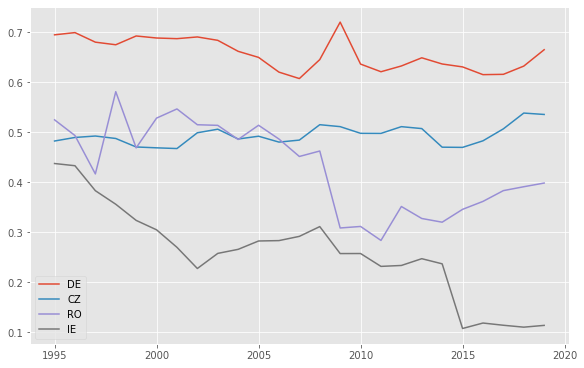

In [113]:
# TODO: this is in national currencies, fix it!
klems_ulc_plot = klems_ulc.groupby(by=['geo_code', 'nace_r2_code'])
with plt.style.context('ggplot'):
    fig, ax = plt.subplots(constrained_layout=True, figsize=(8, 5))
    ax.plot(klems_ulc_plot.get_group(('DE', 'C'))['year'], klems_ulc_plot.get_group(('DE', 'C'))['ULC'], label='DE')
    ax.plot(klems_ulc_plot.get_group(('CZ', 'C'))['year'], klems_ulc_plot.get_group(('CZ', 'C'))['ULC'], label='CZ')
    ax.plot(klems_ulc_plot.get_group(('RO', 'C'))['year'], klems_ulc_plot.get_group(('RO', 'C'))['ULC'], label='RO')
    #ax.plot(klems_ulc_plot.get_group(('IE', 'C'))['year'], klems_ulc_plot.get_group(('IE', 'C'))['ULC'], label='IE') #NOTE !!!

    ax.legend()


In [108]:
klems_ulc_plot.agg({'ULC': 'mean'}).sort_values(by=['ULC'])

,,ULC
geo_code,nace_r2_code,
IE,C,0.258145
EL,TOT,0.378567
RO,TOT,0.400579
BG,TOT,0.415772
IE,TOT,0.420660
...,...,...
BE,C,0.610411
SI,C,0.623179
UK,C,0.646466


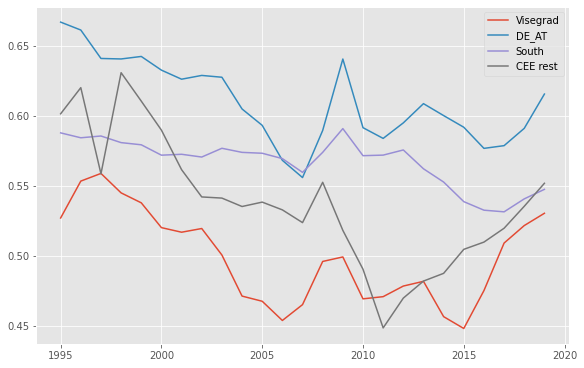

In [104]:
klems_ulc_regions = klems_ulc.groupby(['region', 'nace_r2_code', 'year']).agg({'ULC': 'mean'}).reset_index().groupby(['region', 'nace_r2_code'])
with plt.style.context('ggplot'):
    fig, ax = plt.subplots(constrained_layout=True, figsize=(8, 5))
    ax.plot(klems_ulc_regions.get_group(('visegrad', 'C'))['year'], klems_ulc_regions.get_group(('visegrad', 'C'))['ULC'], label='Visegrad')
    ax.plot(klems_ulc_regions.get_group(('DE_AT', 'C'))['year'], klems_ulc_regions.get_group(('DE_AT', 'C'))['ULC'], label='DE_AT')
    ax.plot(klems_ulc_regions.get_group(('south', 'C'))['year'], klems_ulc_regions.get_group(('south', 'C'))['ULC'], label='South')
    ax.plot(klems_ulc_regions.get_group(('CEE_non_core', 'C'))['year'], klems_ulc_regions.get_group(('CEE_non_core', 'C'))['ULC'], label='CEE rest') # Includes RO+BG and Baltics

    ax.legend()

### Summary - EU-KLEMS


### UNIDO Industrial Statistics database  - use for non-EU countries ULC
### Source: Golub et al. (2018)

In [409]:
unido = pd.read_csv('INDSTAT2_Rev3_export.csv') #  NOTE: INDSTAT2, in National Currencies
unido = unido.replace('...', np.nan)
unido = unido.astype({"Value": float})
unido = unido.pivot(index=["Country Description", "Year"], columns=["Table Description"], values="Value").reset_index()
unido = unido.rename(columns={"Country Description": "country_name", "Year": "year"})
unido['country_code'] = unido['country_name'].apply(lambda x: do_fuzzy_search(x))
unido = unido[unido['country_code'].notna()] # This is important, otherwise the merges below will create millions of NaNs

unido_ulc = unido.merge(gdp_deflator, on=['country_code', 'year'])
unido_ulc = unido_ulc.merge(ppp_raw, on=['country_code', 'year'], suffixes=['_deflator', '_ppp'])
unido_ulc = unido_ulc.merge(ex, on=['country_code', 'year'], suffixes=['', '_ex'])
unido_ulc.head()

,country_name_x,year,Employees,Value added,Wages and salaries,country_code,country_name_y,Country Code_deflator,value_deflator,deflator_2015,country_name,Country Code_ppp,value_ppp,country_name_ex,Country Code,value_ex,monetary_union,value_eur,final_ex_rate
0,Afghanistan,2004,14135.0,NaN,6.652800e+08,AF,Afghanistan,AFG,50.093030,0.489922,Afghanistan,AFG,10.912901,Afghanistan,AFG,47.845312,non_emu,NaN,47.845312
1,Afghanistan,2005,22704.0,NaN,1.136524e+09,AF,Afghanistan,AFG,55.559569,0.543386,Afghanistan,AFG,11.735787,Afghanistan,AFG,49.494597,non_emu,NaN,49.494597
2,Afghanistan,2006,32191.0,NaN,1.732668e+09,AF,Afghanistan,AFG,59.559720,0.582509,Afghanistan,AFG,12.204165,Afghanistan,AFG,49.925331,non_emu,NaN,49.925331
3,Afghanistan,2007,31607.0,NaN,1.941526e+09,AF,Afghanistan,AFG,72.977189,0.713735,Afghanistan,AFG,14.560002,Afghanistan,AFG,49.962018,non_emu,NaN,49.962018
4,Afghanistan,2008,35320.0,NaN,2.145232e+09,AF,Afghanistan,AFG,74.507001,0.728697,Afghanistan,AFG,14.585482,Afghanistan,AFG,50.249615,non_emu,NaN,50.249615


In [412]:
# Variable definitions: we follow Golub et al. (2018) below
# NOTE: (Golub) The series for nominal value added in manufacturing were converted to real terms by deflating them by manufacturing value-added deflators derived from measures of nominal and real manufacturing value added reported in the
# World Bank's World Development Indicators - ratio of Manufacturing VA in current LCU to constant LCU is probably meant by Golub (TODO), NV.IND.MANF.KD, NV.IND.MANF.KN
# NOTE: Schröder (2020) uses GDP deflator (from World Bank) to deflate productivity measure based on VA ( relavant as ULC include an inverse of productivity, see Golub)
# NOTE (Golub): Wages are defined as total labour compensation per employee, converted to dollars at the market exchange rate.
unido_ulc['VA_real'] = (unido_ulc['Value added'] / unido_ulc['deflator_2015']) / unido_ulc['value_ppp'] # real value added in PPP USD
unido_ulc['W_usd'] = unido_ulc['Wages and salaries'] / unido_ulc['final_ex_rate']
unido_ulc['ULC'] = unido_ulc['W_usd'] / unido_ulc['VA_real'] # TODO: 'Wages and salaries are understood as total labour compensation (w*L): check
unido_ulc.head()

,country_name_x,year,Employees,Value added,Wages and salaries,country_code,country_name_y,Country Code_deflator,value_deflator,deflator_2015,...,value_ppp,country_name_ex,Country Code,value_ex,monetary_union,value_eur,final_ex_rate,VA_real,W_usd,ULC
0,Afghanistan,2004,14135.0,NaN,6.652800e+08,AF,Afghanistan,AFG,50.093030,0.489922,...,10.912901,Afghanistan,AFG,47.845312,non_emu,NaN,47.845312,NaN,1.390481e+07,NaN
1,Afghanistan,2005,22704.0,NaN,1.136524e+09,AF,Afghanistan,AFG,55.559569,0.543386,...,11.735787,Afghanistan,AFG,49.494597,non_emu,NaN,49.494597,NaN,2.296259e+07,NaN
2,Afghanistan,2006,32191.0,NaN,1.732668e+09,AF,Afghanistan,AFG,59.559720,0.582509,...,12.204165,Afghanistan,AFG,49.925331,non_emu,NaN,49.925331,NaN,3.470519e+07,NaN
3,Afghanistan,2007,31607.0,NaN,1.941526e+09,AF,Afghanistan,AFG,72.977189,0.713735,...,14.560002,Afghanistan,AFG,49.962018,non_emu,NaN,49.962018,NaN,3.886004e+07,NaN
4,Afghanistan,2008,35320.0,NaN,2.145232e+09,AF,Afghanistan,AFG,74.507001,0.728697,...,14.585482,Afghanistan,AFG,50.249615,non_emu,NaN,50.249615,NaN,4.269151e+07,NaN


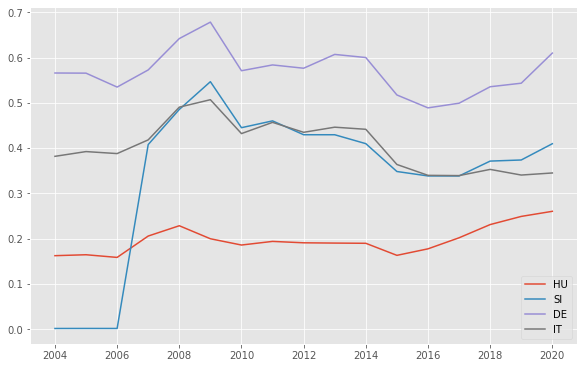

In [413]:
unido_ulc_gr = unido_ulc.groupby(['country_code'])
with plt.style.context('ggplot'):
    fig, ax = plt.subplots(constrained_layout=True, figsize=(8, 5))
    ax.plot(unido_ulc_gr.get_group(('HU'))['year'], unido_ulc_gr.get_group(('HU'))['ULC'], label='HU')
    ax.plot(unido_ulc_gr.get_group(('SI'))['year'], unido_ulc_gr.get_group(('SI'))['ULC'], label='SI')
    ax.plot(unido_ulc_gr.get_group(('DE'))['year'], unido_ulc_gr.get_group(('DE'))['ULC'], label='DE')
    ax.plot(unido_ulc_gr.get_group(('IT'))['year'], unido_ulc_gr.get_group(('IT'))['ULC'], label='IT')
    ax.legend()

### More detailed analysis: TiVA - 
#### see here: https://www.oecd.org/sti/ind/measuring-trade-in-value-added.htm and more directly here: https://stats.oecd.org//Index.aspx?DataSetCode=TIVA_2021_C1

TODO:
- Finish the Dustmann (2014) Fig.1 - add exchange rates
- ULC in absolute values - total wage bill w_it*L_it divided by the value added of the country’s industry Y_it (see Dustmann, 2014 Fig.1)
- ULC for other Baldwin's GVC Factories - get the data
- Read the original Stöllinger paper - is CEE still a manu core?
- Both VA and Employment seem to rise/fall together - should not be VA more persistent according to Baumol?
- get Real Unit Labour Costs!!!!!
- Golub's Value Added deflator - derive from World Bank (see above, perhaps robustness)